<a href="https://colab.research.google.com/github/CAR-Driving/yoloOnGoogleColab/blob/master/Train_with_DarkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install dependencies**: numpy, python-opencv, cython etc.

In [1]:
!apt-get update
!pip3 install numpy
!apt-get install python-opencv -y
!pip install cython

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.1 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

# Building the database by scraping the video of each car type and save yolo detection result as car type for database

We are going to Make databases on the following YouTube video:

     |████████████████████████████████| 1.8MB 5.5MB/s 


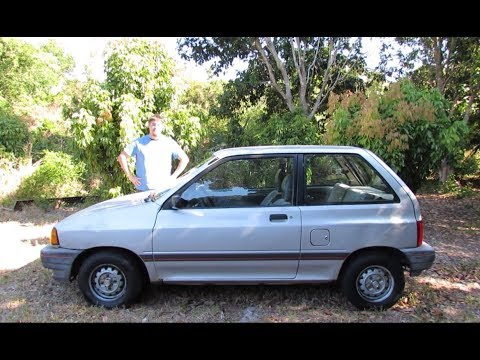

In [2]:
!pip3 install youtube_dl 

#@title
import os
from os.path import exists, join, basename, splitext 
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'xFLckB7vOQc' #(Ford Festiva)


YouTubeVideo(YOUTUBE_ID)

In [ ]:
%cd '/content/'
# %cd '/content/drive/My Drive/Torrent/'
# !rm -rf *.wav
# !youtube-dl  --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!youtube-dl --format "bestvideo+bestaudio[ext=m4a]/bestvideo+bestaudio/best" --merge-output-format mp4 --postprocessor-args "-ss 00:13:00 -t 00:04:00" --output "Ford_Festiva.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}

# !deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio test.wav   --extended --json 
!ls

/content
[youtube] xFLckB7vOQc: Downloading webpage
[youtube] xFLckB7vOQc: Downloading MPD manifest
[dashsegments] Total fragments: 150
[download] Destination: Ford_Festiva.f137.mp4
[download]  24.2% of ~264.87MiB at  2.95MiB/s ETA 00:40

**Install DarkFlow**

In [ ]:
# Clean up the directory
%cd /content/
%rm -rf darkflow
# Clone the darkflow repository
!git clone https://github.com/thtrieu/darkflow
# Change into the darkflow dir and install darkflow with pip
%cd darkflow
!python setup.py build_ext --inplace

Download and install the dataset generator.

In [ ]:
# DID NOT DO THIS STEP SINCE I PROVIDED MY OWN DATA!
# I uploaded to Files a .zip file of jpeg images and .xml annotations each in their own folder within the .zip folder. 

Download pretrained weights.

In [ ]:
%cd /content/darkflow/
%rm -rf weights
%mkdir weights
%cd weights/
!wget https://oc.codespring.ro/s/Jgyo6N4Jen3ma2P/download
%mv download tiny-yolo-voc.weights

Download my modified configuration file.
* The number of classes should be changed from 2 to 1: classes=80 => classes=1
* The number of filters should be changed from 35 to 30

In [ ]:
%cd /content/darkflow/cfg
!wget https://oc.codespring.ro/s/ESfBjt6ofkteedx/download
%mv download tiny-yolo-voc-1c.cfg
# download file and edit cfg file
# upload the edited file

Change labels to "tide" in labels.txt

In [ ]:
# move both cfg and txt files to proper directories 
%cd /content
%mv tiny-yolo-voc-1c.cfg /content/darkflow/cfg
%mv labels.txt /content/darkflow

In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==1.13.2

In [ ]:
%cd /content/darkflow
!./flow --model cfg/tiny-yolo-voc.cfg  --load /content/darkflow/weights/tiny-yolo-voc.weights --demo /content/Ford_Festiva.mp4 --gpu 1 --saveVideo

In [ ]:
!./flow --imgdir sample_img/ --model cfg/tiny-yolo.cfg --load bin/tiny-yolo.weights --gpu 1.0

In [ ]:
!unzip model_data.zip

Start training

In [ ]:
%cd /content/darkflow
!./flow --model cfg/tiny-yolo-voc-1c.cfg --train --dataset "/content/model_data/Tide_images" --annotation "/content/model_data/Tide_annotations" --gpu 1 --epoch 40 --load /content/darkflow/weights/tiny-yolo-voc.weights

In [ ]:
%cd /content/darkflow
#!mv tide.mp4 darkflow
!./flow --model cfg/tiny-yolo-voc-1c.cfg --load -1 --savepb

# I used the pb file and meta file for Movidius

In [ ]:
!./flow --model cfg/tiny-yolo-voc-1c.cfg --load /content/darkflow/weights/tiny-yolo-voc.weights --demo tide.mp4 --gpu 1.0 --saveVideo True

In [ ]:
!python3 flow --pbLoad tiny-yolo-voc-4c.pb --metaLoad tiny-yolo-voc-4c.meta --demo ../Videoclip8.avi --gpu 1.0 --saveVideo

In [ ]:

!mv tiny-yolo-voc-4c.pb ../

In [ ]:
%cd ..
